# Лаборатная работа 1
## Загрузка и обработка приложений

### Загрузка изображений

Я буду конформистом и буду использовать openCV для обработки изображений. По классике программистов - улыбки, котики, собачки. Читаю изображения с помощью функции imread и проверяю, всё ли на месте. Соберу всю в массив images, чтобы по возможности поменьше повторяться.

Потом я пишу функцию для показа изображений на основе matplotlib, предварительно переведя из BRG в RGB, чтобы всё не выглядело по инопланетянски.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

smile_img = cv2.imread('./images/smile.jfif')
cat_img = cv2.imread('./images/cat.jfif')
dog_img = cv2.imread('./images/pes.jfif')

images = [smile_img, cat_img, dog_img]
titles = ['Улыбочка', 'Котик', 'Пееес']

for img in images:
    if img is None:
        print('А где...')
    else:
        print('Что-то да есть')

Что-то да есть
Что-то да есть
Что-то да есть


In [2]:
def show_images(images, titles=None, cols=3, figsize=(12, 4)):
    """
    Отображает список изображений (цветных или grayscale) в сетке.

    Параметры:
    ----------
    images : list
        Список изображений (в формате BGR, RGB или grayscale).
    titles : list[str]
        Заголовки для каждого изображения (может быть None).
    cols : int
        Количество столбцов для вывода.
    figsize : tuple
        Размер всей фигуры matplotlib (ширина, высота).
    """

    n = len(images)
    rows = (n + cols - 1) // cols

    plt.figure(figsize=figsize)

    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)

        if img is None:
            plt.text(0.5, 0.5, "⚠️ None", ha="center", va="center", fontsize=12)
            plt.axis("off")
            continue

        # Если изображение цветное (3 канала)
        if len(img.shape) == 3:
            # OpenCV загружает в BGR — меняем порядок на RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
        else:
            # grayscale (2D)
            plt.imshow(img, cmap='gray')

        if titles and i < len(titles):
            plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


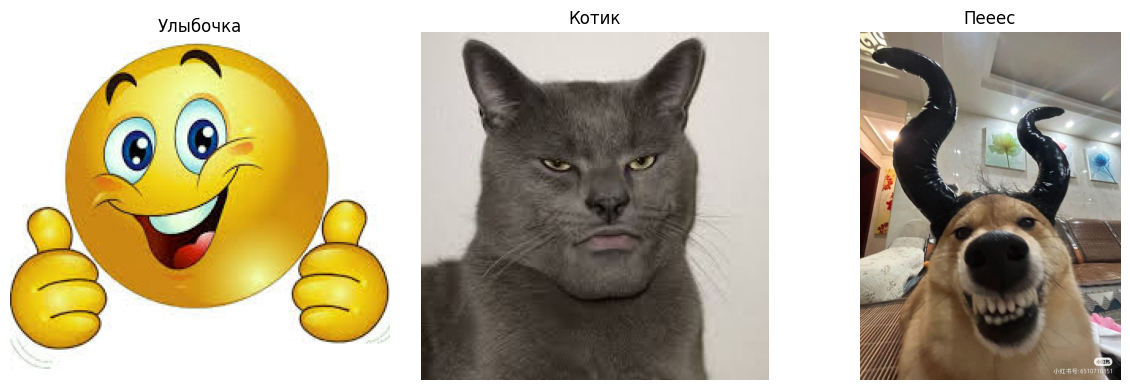

In [3]:
show_images(images, titles)

### Преобразование в оттенки серого

Погнали. Первый способ - усреднение каналов. Надо пройтись по каждому пикселёчку, взять значения каналов R, G, B и найти их среднее значение и заменить на него значения всех каналов. С этим отлично справится функция mean из пакета numpy. Работать будем на 2 оси, так как на 0 строка, а на 1 столбцы. Это значение будет во float, поэтому надо будет перевести его в int.

С помощью ранее написанной функции выведем весь этот траур на экран.

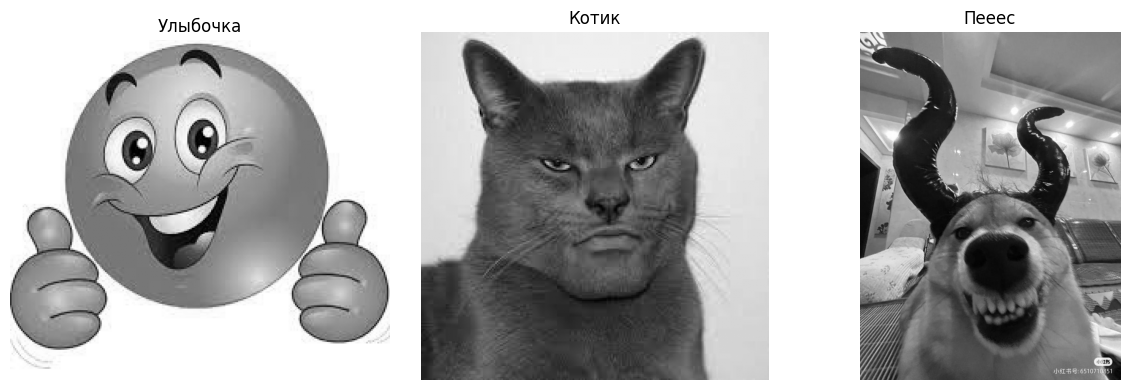

In [4]:
images_bw = []

for img in images:
    if img is not None:
        gray = np.mean(img, axis=2).astype(np.uint8)
        images_bw.append(gray)

show_images(images_bw, titles)

Второй способ - через модель HSV. H - цвет, S - насыщенность, V - яркость. Просто переведём изображения в этот формат и выведем насыщенность и цвет в 0, оставив только яркость. Для этого используем функцию split, чтобы управлять каналами по отдельности.

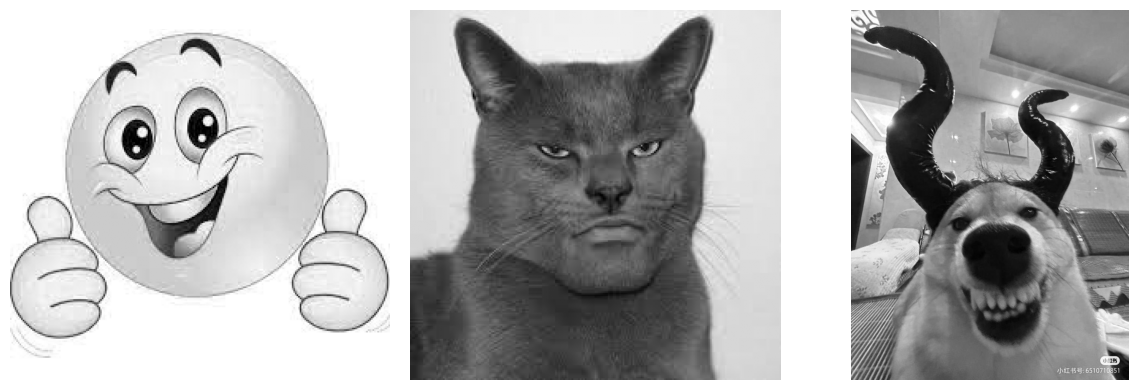

In [5]:
images_bw_hsv = []

for img in images:
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(img)
    images_bw_hsv.append(v)

show_images(images_bw_hsv)

### Бинаризация

Делаем пиксели либо черными, либо белыми, а где будет порог - решит Отсу. Для этого исопльзуем функцию threshold, который вернет значение порога и само изображение. Туда передадим ранее созданные чб изображения, 255 как максимальное значение (белый) и то, что мы будем находить порог с помощью метода Отсу, а не проставлять самостоятельно.

Порог:  188.0
Порог:  138.0
Порог:  102.0


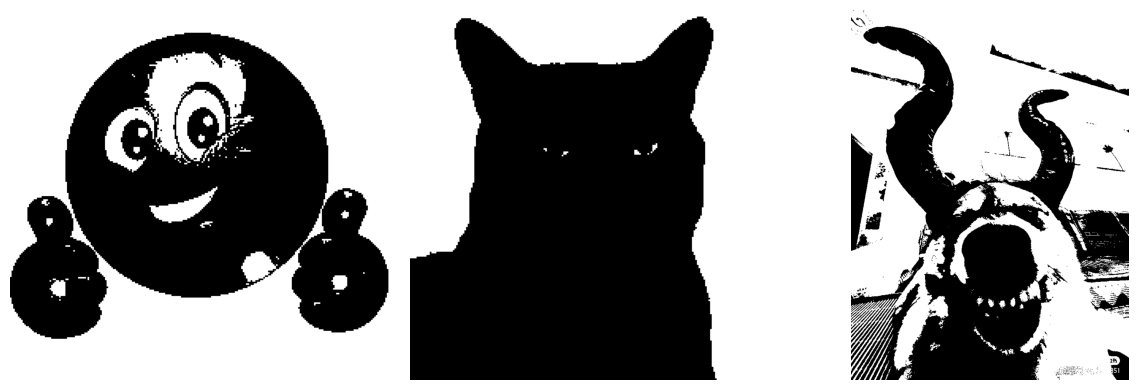

In [6]:
binary_images = []

for img in images_bw:
    thresh_val, binary_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    binary_images.append(binary_otsu)
    print('Порог: ', thresh_val)

show_images(binary_images)

### Нормализация, эквализация, растяжение гистограммы

Нормализация, эквализация, растяжение гистограммы - способы улучшения изображения. Сама гистограмма показывает распределение уровня яркости пикселей от 0 до 255. Если в гистограмме всё более менее распределено равномерно, значит, изображение клёвое контрастное, а если значения сосредоточены в одной области - разобрать происходящее сложнее. 

Начнём с нормализации - можно сказать, мы просто "растягиваем" гистограмму. В openCV это делается с помощью функции normalize. Используем линейное растяжение и диапазон от 0 до 255.

Для простоты сравнения с вывела сначала оригинал, потом нормализованные картинки. Они стали чуть контрастнее.

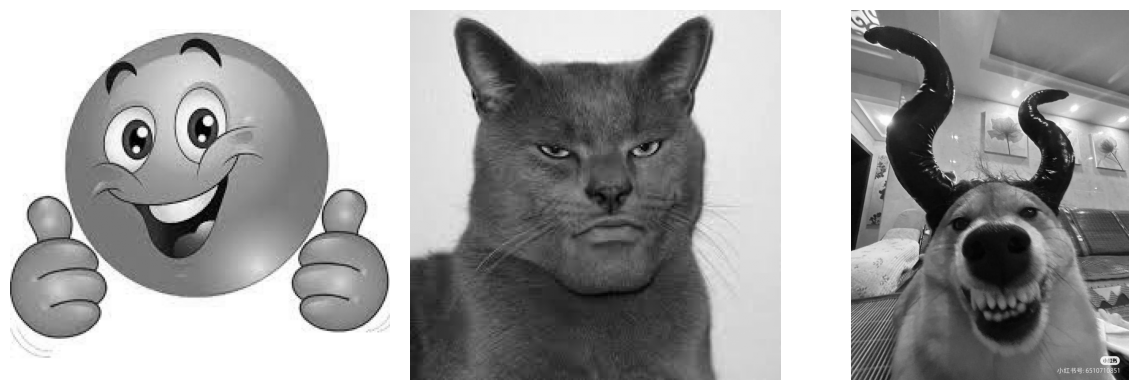

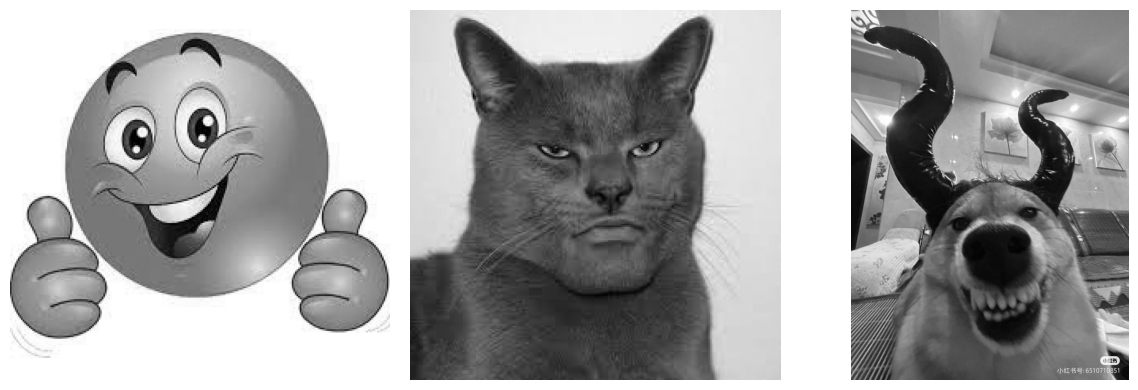

In [7]:
normalized_images = []

for img in images_bw:
    normalized = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    normalized_images.append(normalized)

show_images(images_bw)
show_images(normalized_images)

Растяжение - насколько я поняла, такой же концепт, но тут можно самостоятельно выбирать диапазон и растягивать куски выборочно. Делается по формуле без функции в библиотеке.

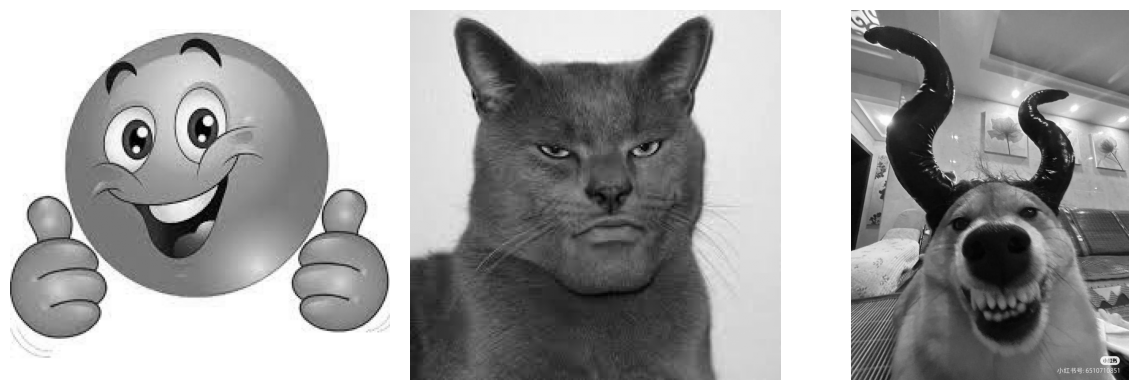

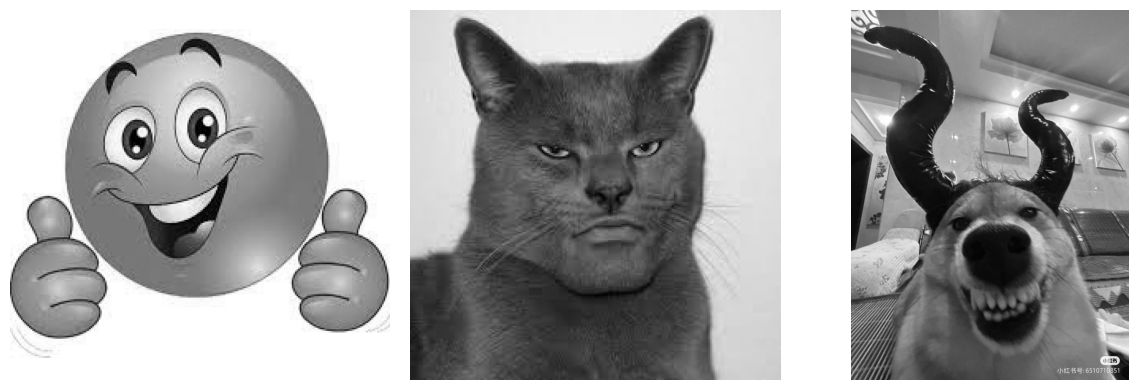

In [8]:
stretched_images = []

for img in images_bw:
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    stretched_images.append(stretched)

show_images(images_bw)
show_images(stretched_images)

Последний метод - эквализация, чуть более хитрый. Он вычисляет гитограмму и находит кумулятивную функцию распределения, после чего перераспределяет яркость. Он, слава богу, находится под капотом openCV в методе equalizeHist. Вообще он по идее должен быть самым крутым, но на этих примерах сработал странновато. Кроме пса.

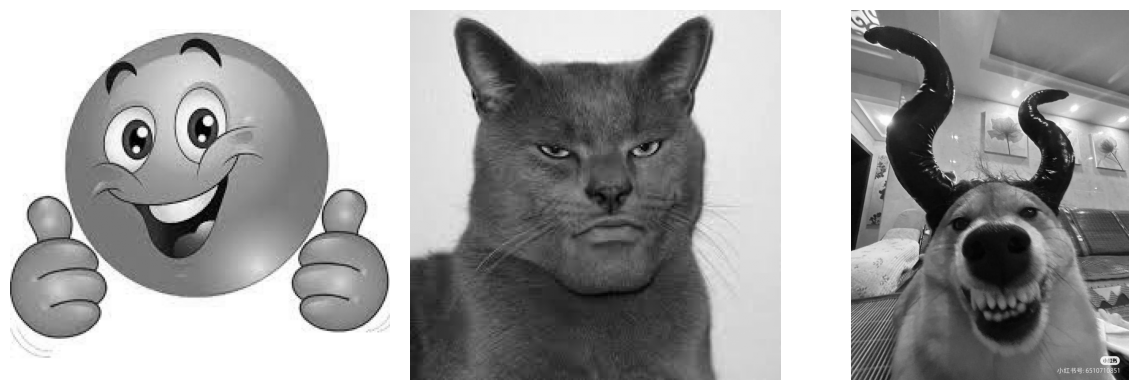

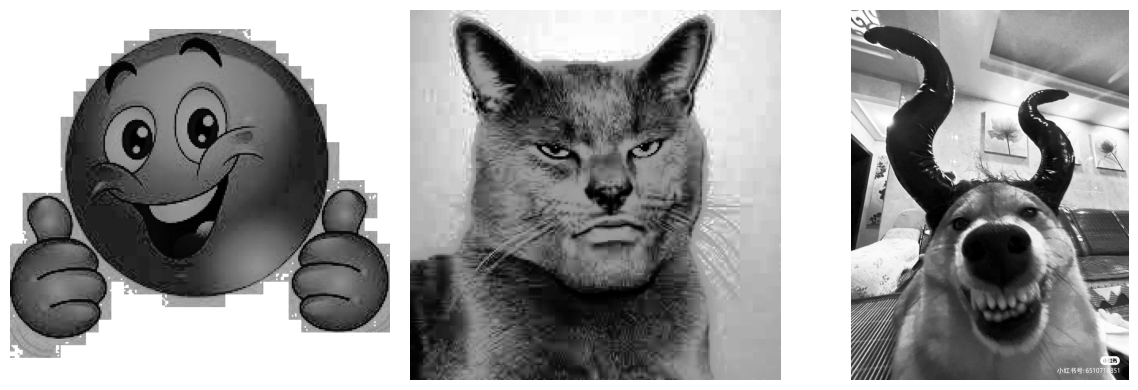

In [9]:
equalized_images = []

for img in images_bw:
    equalized = cv2.equalizeHist(img)
    equalized_images.append(equalized)

show_images(images_bw)
show_images(equalized_images)

## Операции свёртки с различными масками

### Размытие (Гауссиан)

Гауссово размытие нужно для того, чтобы сделать изображение более гладким, уменьшив количество шума. Используется фильтр, основанный на нормальном (гауссовом) распределении — “колокольчик”. Каждый пиксель заменяется взвешенным средним его соседей. Пиксели ближе к центру имеют больший вес (влияют сильнее), дальние — меньше. В openCV это делается с помощью функции GaussianBlur. В функции есть 2 важных параметра, влияющие на силу размытия - размер ядра (сколько пикселей в окрестности будут влиять на этот пиксель) и sigma - то, насколько быстро веса уменьшаются от центра к краю.

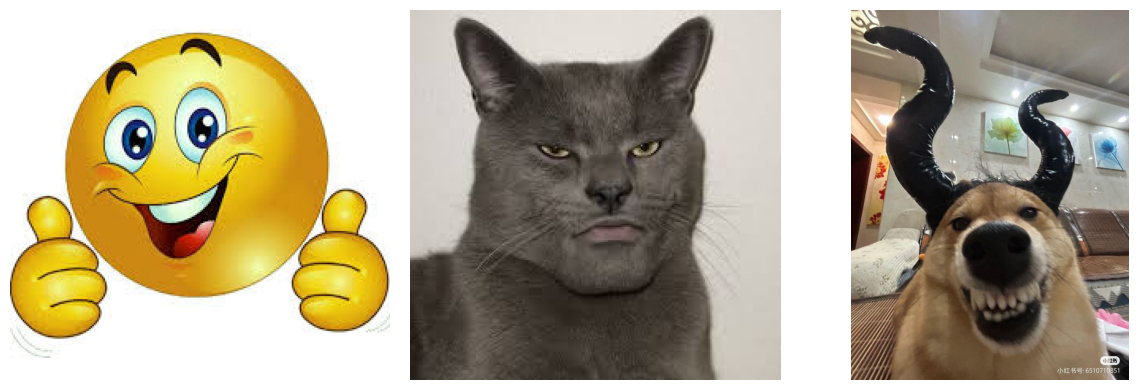

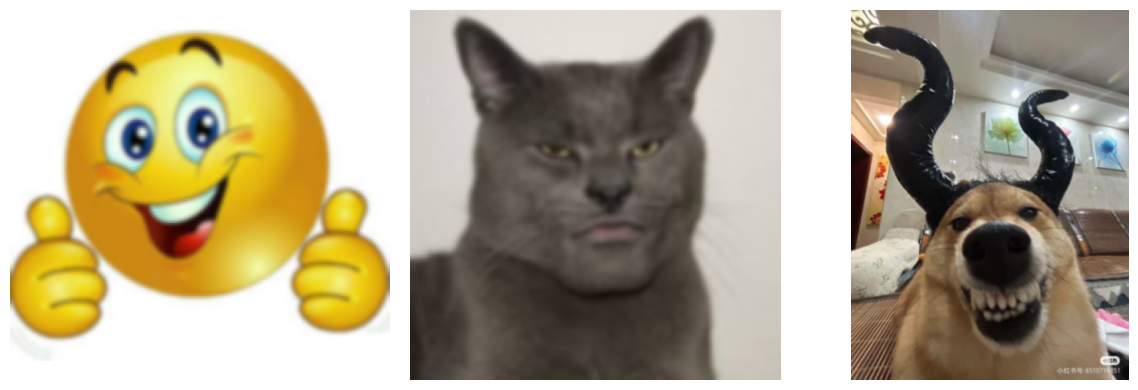

In [10]:
blurred_images = []

for img in images:
    blur = cv2.GaussianBlur(img, (7, 7), 1.5)
    blurred_images.append(blur)

show_images(images)
show_images(blurred_images)

### Повышение четкости (Лаплассиан и его производные)

Теперь мы наоборот хотим сделать изображение более четким. Для этого мы хотим найти, где яркость изображения меняется (контуры) и сделать их более контрастными. Для этого надо найти места резких изменений в изменении яркости, т.е. вторую производную. Используем функцию Laplacian из openCV. Там есть 2 параметра - ddepth (глубина выходного изображения) и ksize. Это размер ядра (1, 3, 5). Чем больше — тем сильнее “реагирует” на шум. Альфа - коэффициент усиления. После неё избавляемся от отрицательных значений и приводит к инту с помощью convertScaleAbs.

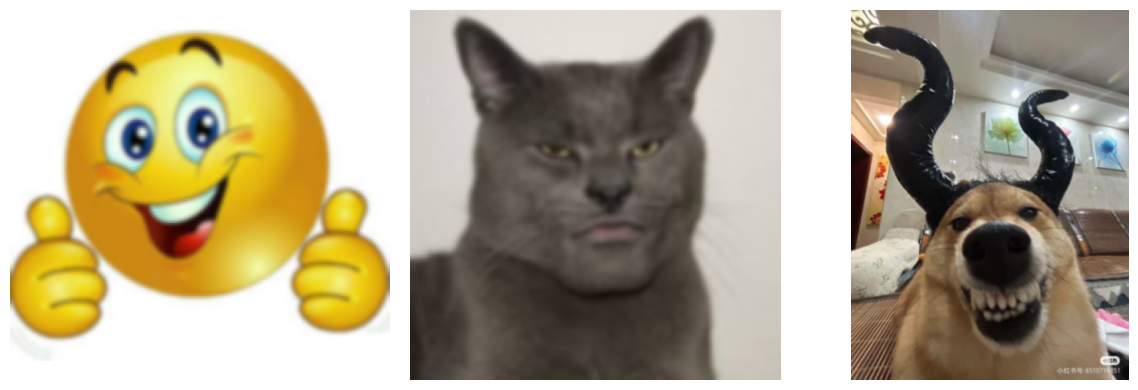

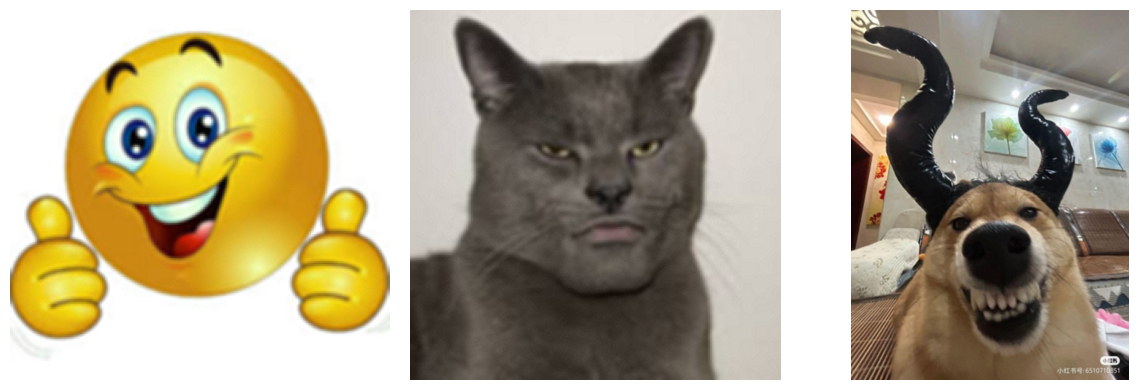

In [11]:
sharp_images = []
alpha = 1.0

for img in blurred_images:
    lap = cv2.Laplacian(img, cv2.CV_64F)
    sharp = cv2.convertScaleAbs(img - alpha * lap)
    sharp_images.append(sharp)

show_images(blurred_images)
show_images(sharp_images)

### Выделение краёв (оператор Собеля)

Тут мы хотим найти границы и контур объектов. Для этого смотрим, как меняется яркость с помощью производной. Затем мы берем специальные матрицы свертки, которые умножаются (сворачиваются) с изображением,
и в результате получаем два новых изображения - где контуры по вертикали и по горизонтали. Для этого в openCV есть функция Sobel, в которую передаются глубина выходных данных (cv2.CV_64F, чтобы не терять отрицательные значения), порядок производной по оси X (1 — первая производная), порядок производной по оси Y и размер ядра (1, 3, 5, 7) — чем больше, тем “грубее” контуры.

Затем контуры надо объединить. Вычисляем модуль градиента (корень из суммы квадратов). Для этого есть функция magnitude.

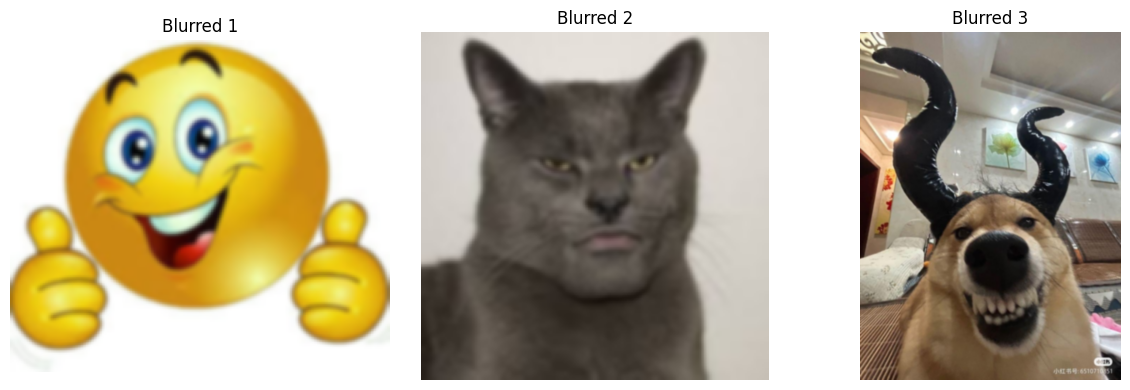

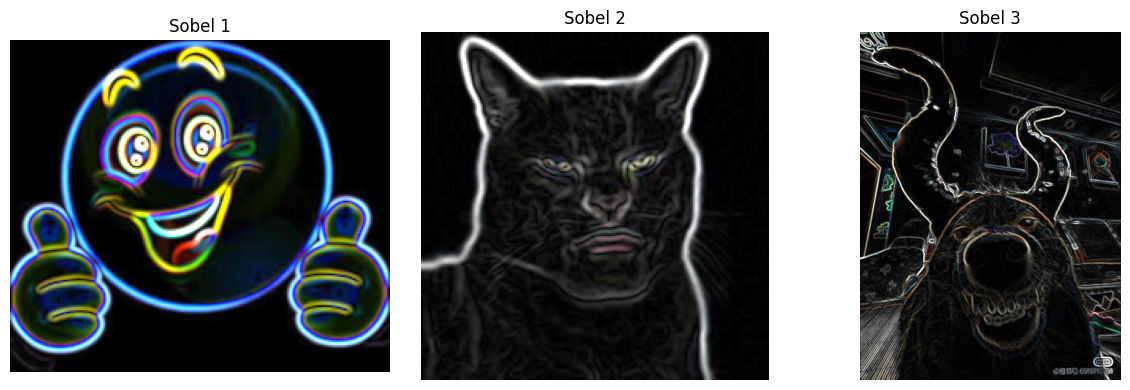

In [12]:
sobel_images = []

for img in blurred_images:
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    sobel = cv2.magnitude(sobel_x, sobel_y)

    sobel_uint8 = cv2.convertScaleAbs(sobel)

    sobel_images.append(sobel_uint8)

show_images(blurred_images, ["Blurred 1", "Blurred 2", "Blurred 3"])
show_images(sobel_images, ["Sobel 1", "Sobel 2", "Sobel 3"])


## Геометрические преобразования

### Циклический сдвиг пикселей (по горизонтали и по вертикали)

Тут мы сдвигаем пиксели, а те, которые остаются за бортом, появляются с другой стороны. Чтобы такое замутить, можно использовать функцию roll из пакета numpy. 

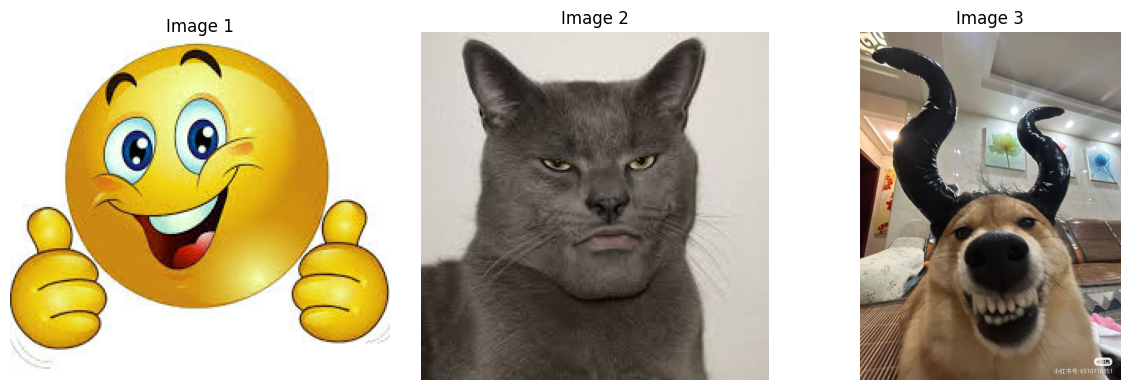

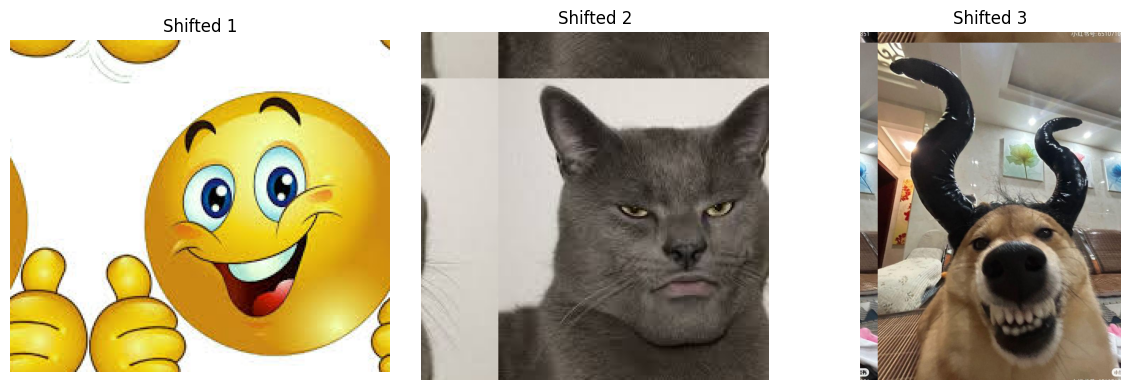

In [13]:
shifted_images = []

dx = 50  # сдвиг по горизонтали (вправо)
dy = 30  # сдвиг по вертикали (вниз)

for img in images:
    shifted = np.roll(img, shift=(dy, dx), axis=(0, 1))
    shifted_images.append(shifted)

show_images(images, ["Image 1", "Image 2", "Image 3"])
show_images(shifted_images, [f"Shifted 1", f"Shifted 2", f"Shifted 3"])


### Поворот изображения относительно произвольного центра

Чтобы повернуть изображение на угол θ вокруг произвольного центра (cx, cy), нам нужна аффинная матрица трансформации. В OpenCV это делается функцией getRotationMatrix2D, куда передаются центр поворота, угол в градусах (положительный = по часовой стрелке) и масштаб (1.0 = без изменения размера). 

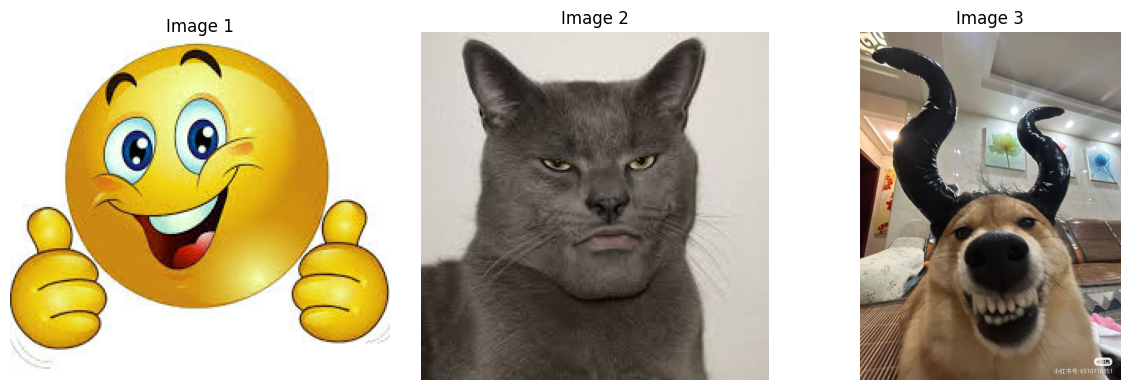

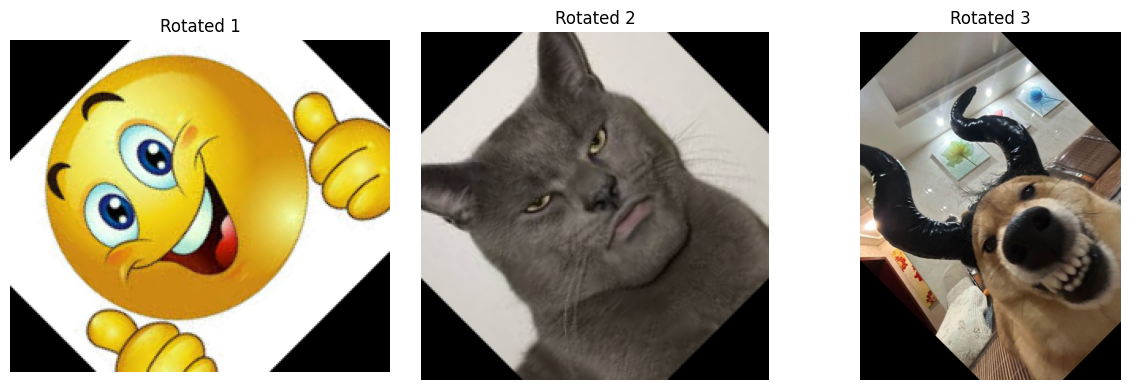

In [14]:
rotated_images = []

angle = 45  # угол поворота в градусах
scale = 1.0 # масштаб (1.0 = без изменения размера)

for img in images:
    h, w = img.shape[:2]
    center = (w//2, h//2)  

    M = cv2.getRotationMatrix2D(center, angle, scale)

    rotated = cv2.warpAffine(img, M, (w, h))
    rotated_images.append(rotated)

show_images(images, ["Image 1", "Image 2", "Image 3"])
show_images(rotated_images, [f"Rotated 1", f"Rotated 2", f"Rotated 3"])
